<span style="color: blue">07.10.2024

**Цель:** Знакомство с фреймворком pytorch

**Задачи кратко:** подготовить рабочее окружение, реализовать загрузку данных, реализовать цикл обучения, обучить нейронную сеть для решения задачи классификации изображений

**Рекомендуемые требования к окружению:**
1. Ubuntu 22.04
2. Python 3.10+
3. Pytorch 2+
4. Virtual env
5. Visual Studio Code
6. Git (gitlab)

**Задачи:**
1. Установить Visual Studio Code, создать новый проект (https://code.visualstudio.com/)
2. В директории проекта создать виртуальное окружение с использованием пакета venv и активировать его (https://docs.python.org/3/library/venv.html)
3. Установить pytorch с использованием команды pip (https://pytorch.org/get-started/locally/)
4. Обучить нейронную сеть для классификации изображений FashionMnist используя обучающие примеры из документации pytorch (https://pytorch.org/tutorials/beginner/basics/intro.html):
    - (a) Изучить концепцию Tensors
    - (b) Изучить каким образом в pytorch осуществляется доступ к данным и загрузка данных в процессе обучения https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
    - (c) Изучить основные принципы трансформации данных (аугментации) https://pytorch.org/vision/stable/transforms.html
    - (d) Создать простую 3-5 слойную модель https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
    - (e) Реализовать цикл обучения и валидации и обучить модель https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
    - (f) Исследовать зависимость характеристик модели от гиперпараметров обучения - темпа обучения, выбора оптимизатора, параметров оптимизатора
    - (g) Дообучить предобученную модель resnet18 https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#finetuning-the-convnet для решения задачи классификации и сравнить результаты с f

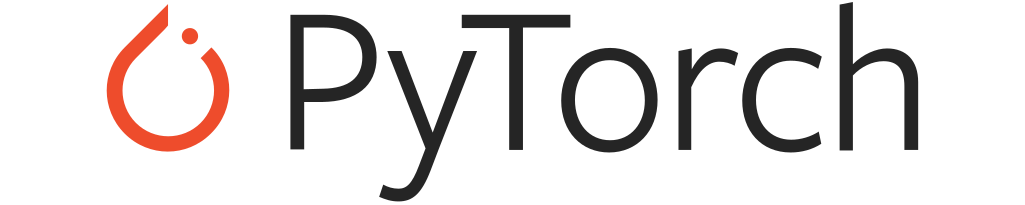

### Подготавливая датасеты можно решать разбивать данные по папкам как в встроенных в PyTorch датасетах интерфейс или создавать свой. Для задач ИПФ нужно создавать свой интерфейс работы с данными

### Лабы делаются согласно требований к окружению (возможно стоит все-таки GitHub взять вместо GitLab)

<span style="color: blue">22.10.2024 (Вернулся из отпуска)

### Геоданные не получится разложить в классический интерфейс датасетов PyTorch, будем использовать свой

### В вордовском документе отразить основные результаты работы

### Начинать изучать PyTorch следует отсюда [PyTorch Quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html), но после изучения уроков 1-7 (от Тензоров до сохранения/загрузки моделей)
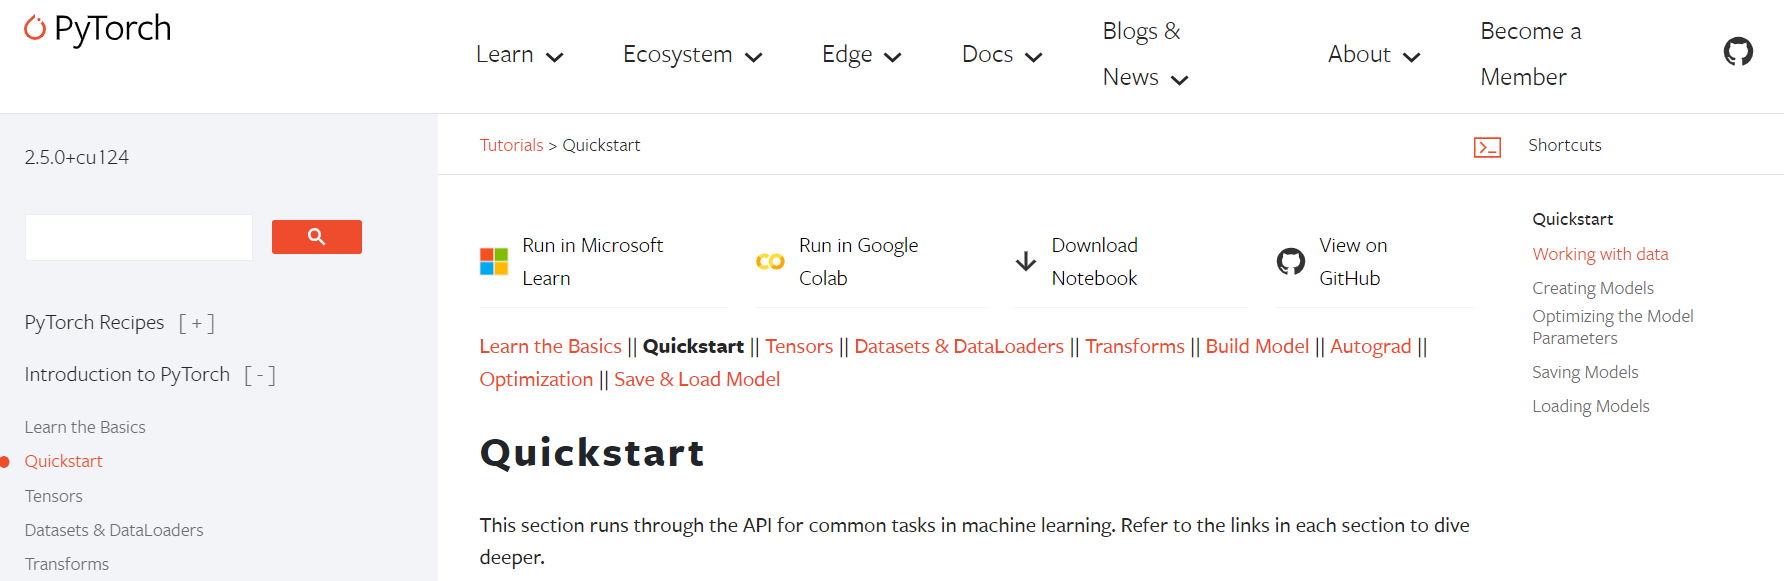

### Потом нужно пройти вот этот туториал [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
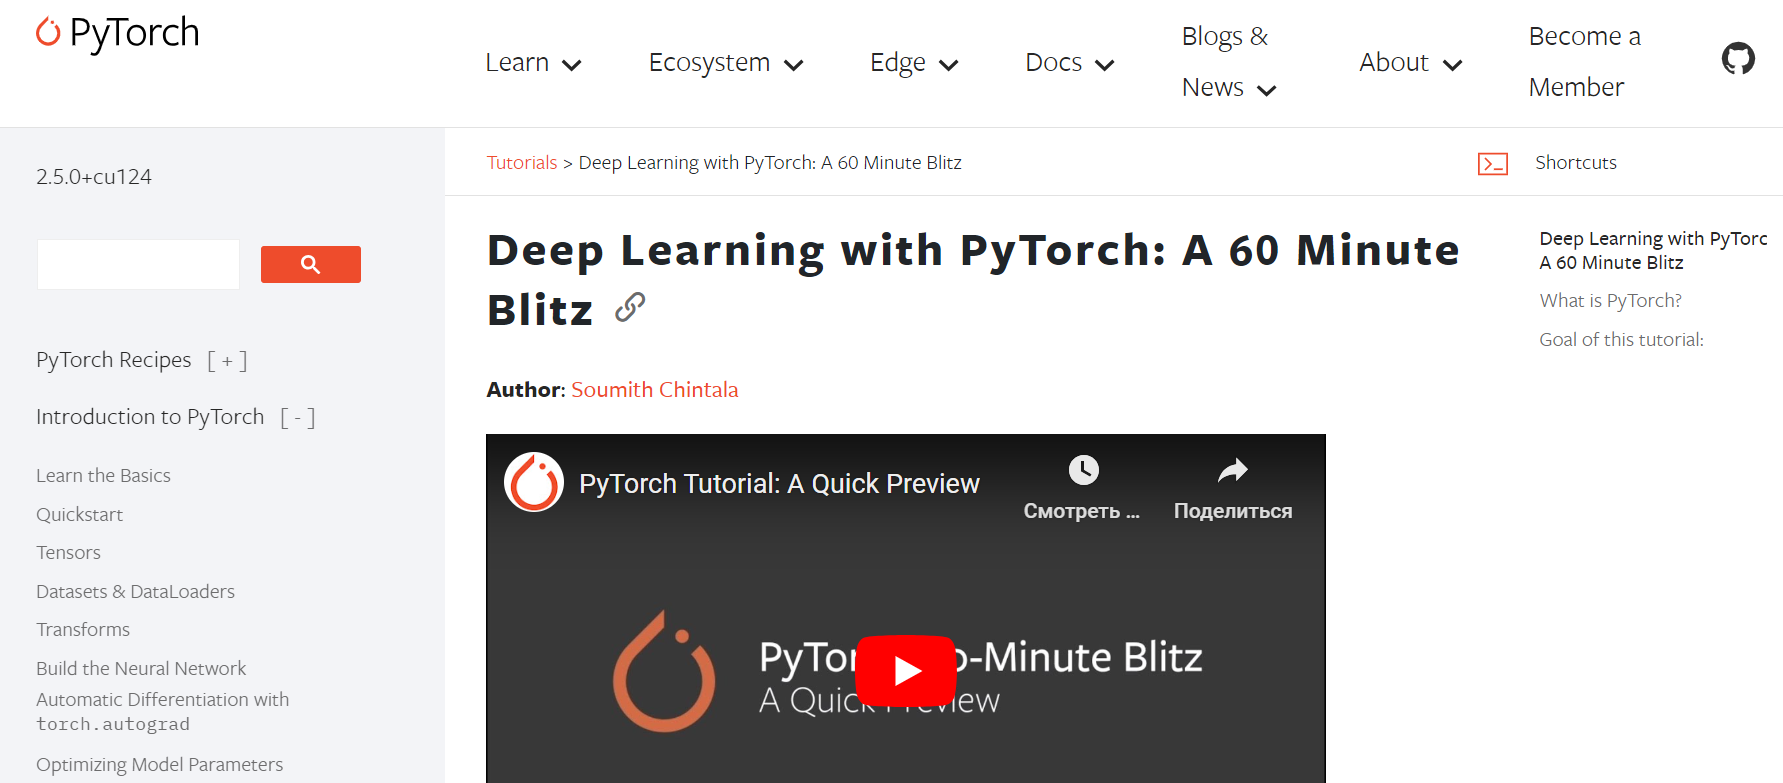

### В конце изучить то, из-за незнания чего я получил отказ на одну стажировку [Visualizing Models, Data, and Training with TensorBoard](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)
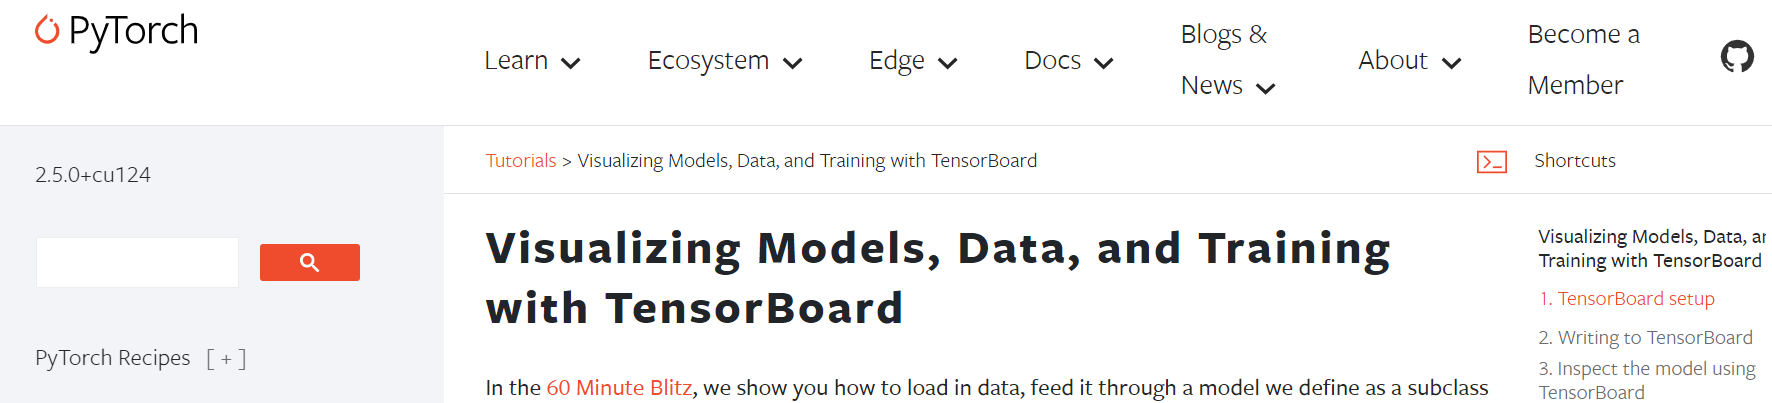

### DataLoader не просто считывает и обрабатывает датасет, но и упаковывает его в батчи. Он позволяет обучать модель на данных параллельно, что позволяет одновременно использовать много видеокарт (например 8 Nvidia A6000 48GB).

# Tensors

In [1]:
import numpy as np
import torch

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

### Создадим матрицу из единиц размерностью с исходной

In [4]:
x_ones = torch.ones_like(input=x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [5]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5054, 0.8339, 0.3440],
        [0.3024, 0.6045, 0.4961]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
    
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cpu


In [8]:
tensor = torch.ones(4, 4)
tensor[:, 1] = 0

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [9]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [11]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


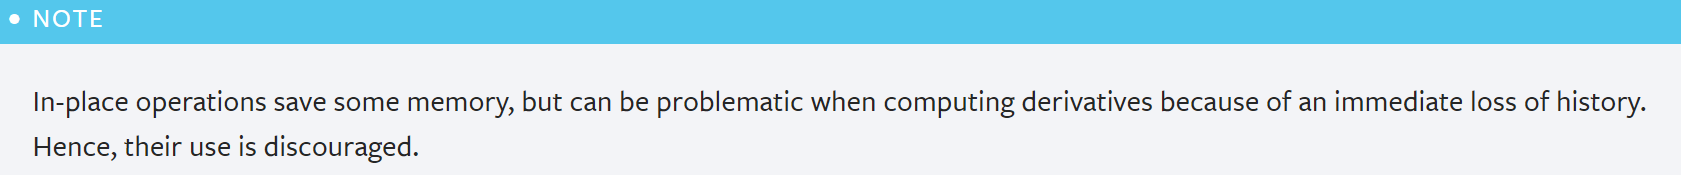

In [12]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [13]:
# A change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [14]:
n = np.ones(5)
t = torch.from_numpy(n)
print(f"n: {n}")
print(f"t: {t}")

n: [1. 1. 1. 1. 1.]
t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [15]:
# Changes in the NumPy array reflects in the tensor.
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Datasets & DataLoaders

In [16]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [17]:
training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root='data', train=False, download=False, transform=ToTensor())

In [18]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

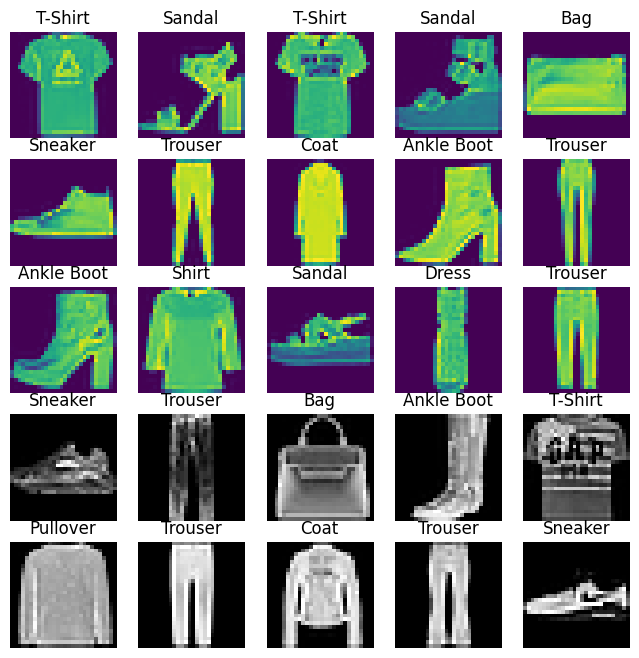

In [19]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # print(sample_idx)
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')

    if i > 15:
        plt.imshow(img.squeeze(), cmap='gray')  # Convert images into gray
        continue
    plt.imshow(img.squeeze())
    
plt.show()

# Transforms

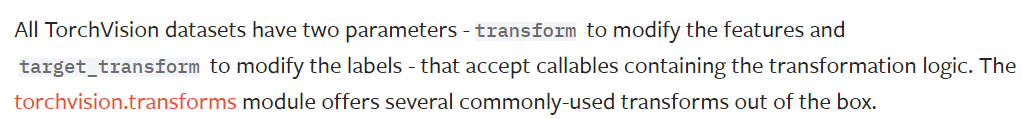

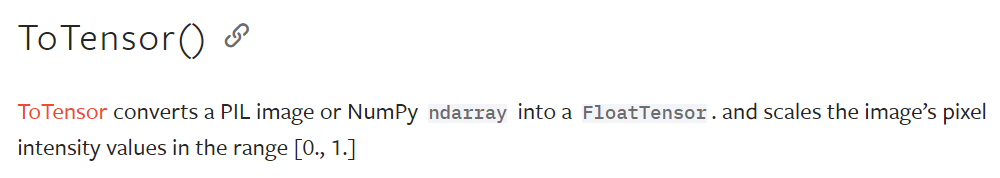

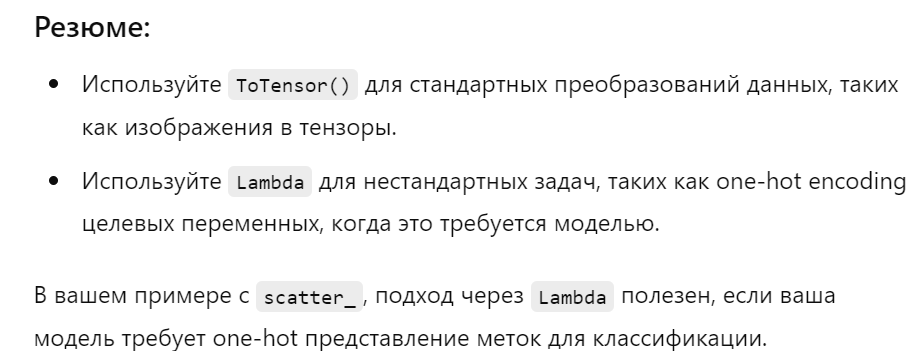

# Build the Neural Network

In [20]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [22]:
print(f"Using {device} device")

Using cpu device


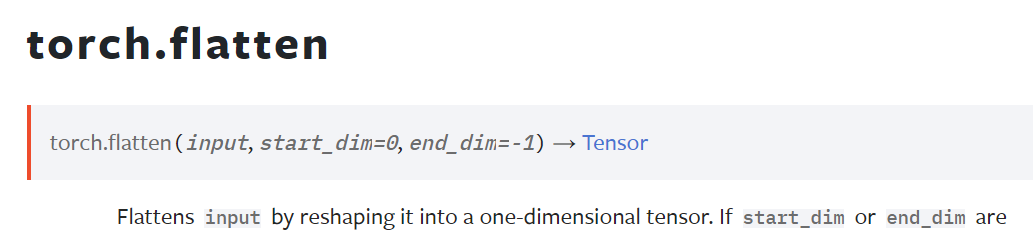

In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [24]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


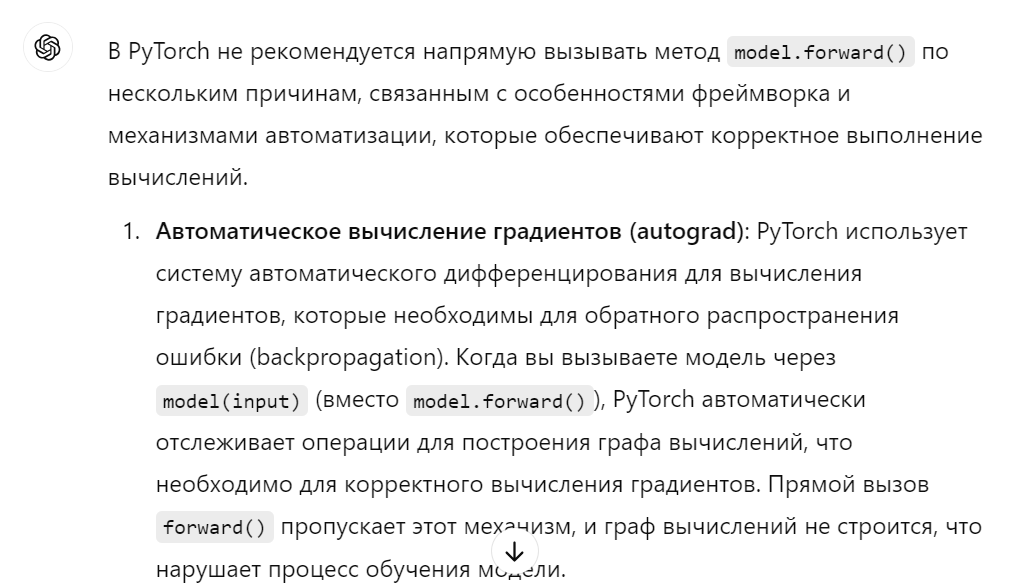

In [25]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0])


In [26]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [27]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [28]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### Linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In [29]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.3041,  0.0027, -0.1861,  0.2803, -0.1730,  0.0914,  0.1646,  0.1463,
         -0.0696,  0.5329, -0.3522,  0.1100, -0.1102, -0.2001,  0.0732, -0.2368,
          0.1779, -0.1258, -0.3338, -0.1765],
        [ 0.1256, -0.3150, -0.3601, -0.0039, -0.2254, -0.0085,  0.0637, -0.2433,
         -0.2518,  0.6049, -0.6907,  0.3310,  0.0075, -0.1627, -0.3908, -0.0162,
          0.2617, -0.1557, -0.3142, -0.2457],
        [ 0.2997, -0.0605,  0.0291, -0.2386,  0.1019,  0.1718,  0.0922,  0.0666,
         -0.0952,  0.1866, -0.7160,  0.1832,  0.0941, -0.1674,  0.0618, -0.3163,
          0.0175, -0.2553, -0.1788,  0.0517]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.3041, 0.0027, 0.0000, 0.2803, 0.0000, 0.0914, 0.1646, 0.1463, 0.0000,
         0.5329, 0.0000, 0.1100, 0.0000, 0.0000, 0.0732, 0.0000, 0.1779, 0.0000,
         0.0000, 0.0000],
        [0.1256, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0637, 0.0000, 0.0000,
         0.6049, 0.0000, 0.3310, 0.0075, 0.0000, 0.00

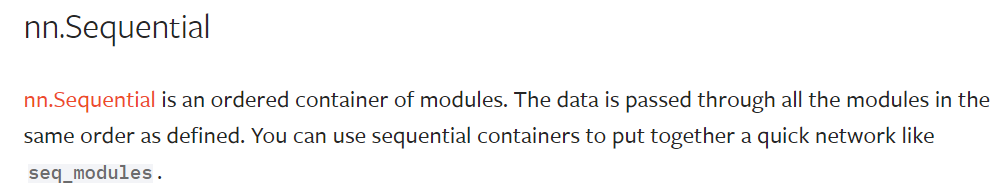

In [30]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

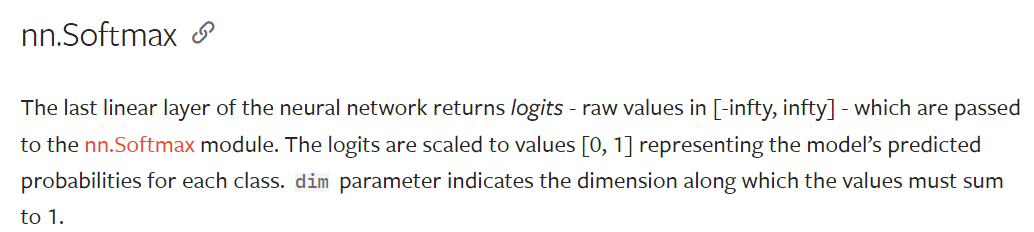

In [31]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.1020, 0.1059, 0.1225, 0.1134, 0.1207, 0.0903, 0.0914, 0.0918, 0.0844,
         0.0776],
        [0.1022, 0.1104, 0.1302, 0.1150, 0.1317, 0.0846, 0.0799, 0.0898, 0.0830,
         0.0732],
        [0.1147, 0.0998, 0.1257, 0.1154, 0.1214, 0.0938, 0.0810, 0.0924, 0.0759,
         0.0800]], grad_fn=<SoftmaxBackward0>)

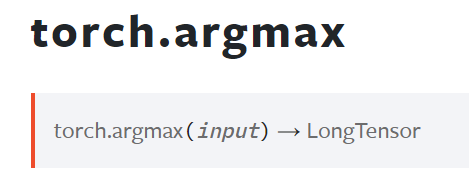

In [32]:
torch.argmax(pred_probab, dim=1)

tensor([2, 4, 2])

In [33]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0218, -0.0135,  0.0245,  ..., -0.0077,  0.0313,  0.0040],
        [-0.0304, -0.0327,  0.0272,  ...,  0.0291, -0.0265,  0.0051]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0256, -0.0054], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0050,  0.0286,  0.0326,  ...,  0.0269,  0.0044,  0.0102],
        [ 0.0408,  0.0040,  0.0250,  ...,  0.0361, -0.0051, -0.0214]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

# Automatic Differentiation with ```torch.autograd```

In [34]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

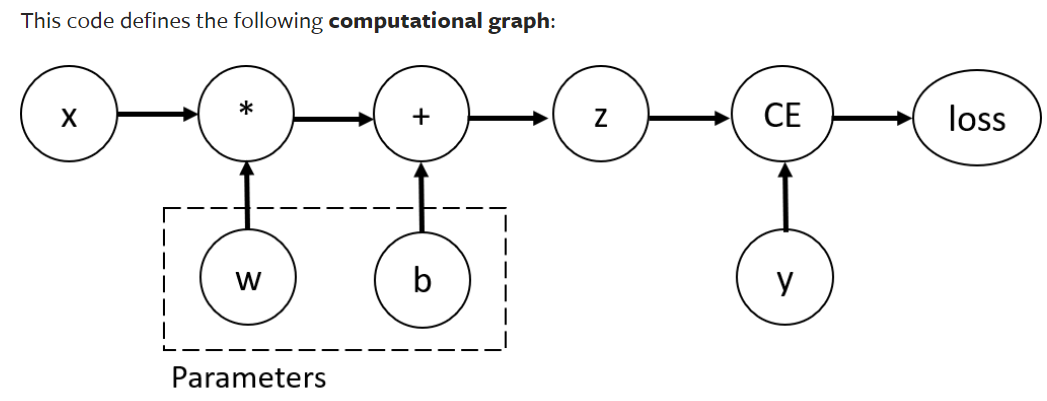

In [35]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x000002D4E6037C70>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000002D4E6037E50>


In [36]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1538, 0.2486, 0.0405],
        [0.1538, 0.2486, 0.0405],
        [0.1538, 0.2486, 0.0405],
        [0.1538, 0.2486, 0.0405],
        [0.1538, 0.2486, 0.0405]])
tensor([0.1538, 0.2486, 0.0405])


In [37]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


### Another way to achieve the same result is to use the detach() method on the tensor:

In [38]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


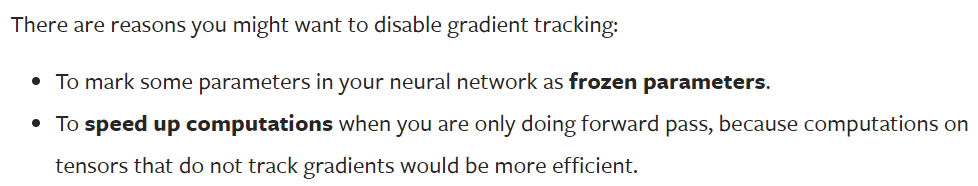

# Optimizing Model Parameters

In [39]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [40]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

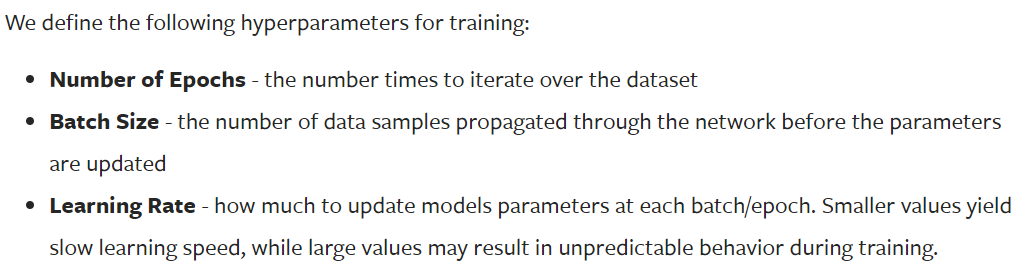

### Each iteration of the optimization loop is called an epoch.

In [41]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [43]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [44]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [46]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307672  [   64/60000]
loss: 0.573637  [ 6464/60000]
loss: 0.401066  [12864/60000]
loss: 0.501786  [19264/60000]
loss: 0.412471  [25664/60000]
loss: 0.416903  [32064/60000]
loss: 0.376777  [38464/60000]
loss: 0.540788  [44864/60000]
loss: 0.502573  [51264/60000]
loss: 0.511626  [57664/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.410592 

Epoch 2
-------------------------------
loss: 0.260715  [   64/60000]
loss: 0.347303  [ 6464/60000]
loss: 0.289157  [12864/60000]
loss: 0.399407  [19264/60000]
loss: 0.423528  [25664/60000]
loss: 0.375013  [32064/60000]
loss: 0.324487  [38464/60000]
loss: 0.476264  [44864/60000]
loss: 0.406237  [51264/60000]
loss: 0.469038  [57664/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.405493 

Epoch 3
-------------------------------
loss: 0.238714  [   64/60000]
loss: 0.309499  [ 6464/60000]
loss: 0.246351  [12864/60000]
loss: 0.333290  [19264/60000]
loss: 0.364601  [25664/60000]
loss: 0.355754  [32064/600